In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

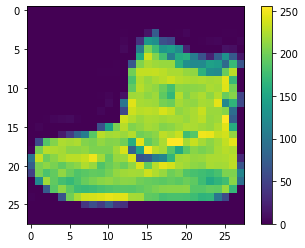

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

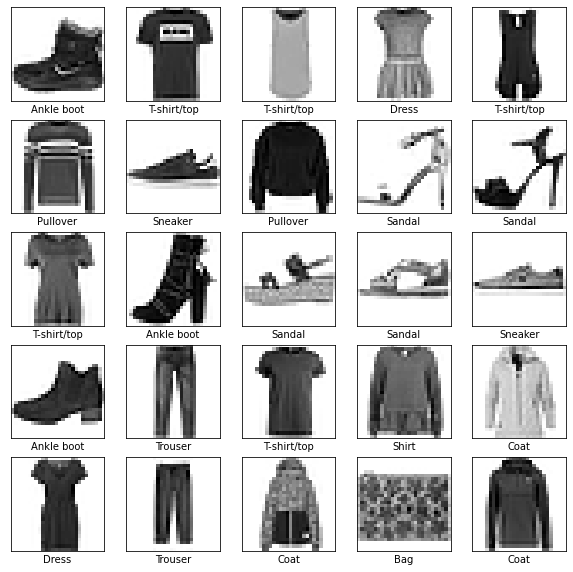

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4959 - accuracy: 0.8264
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8648
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.8778
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8857
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8925
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8965
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.8995
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.9051
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2452 - accuracy: 0.9083
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3461 - accuracy: 0.8875

테스트 정확도: 0.887499988079071


In [34]:
predictions = model.predict(test_images)

In [35]:
predictions[0]

array([8.0005208e-10, 2.2207639e-12, 1.6788638e-09, 3.2706089e-16,
       1.8148761e-09, 1.2916216e-04, 1.4204855e-10, 4.2560862e-04,
       2.3631628e-11, 9.9944526e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

In [38]:
test_labels[:10], test_labels[5000:5010], test_labels[-10:]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8),
 array([2, 3, 6, 4, 6, 3, 6, 9, 4, 9], dtype=uint8),
 array([5, 6, 8, 9, 1, 9, 1, 8, 1, 5], dtype=uint8))

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

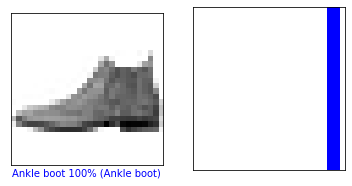

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

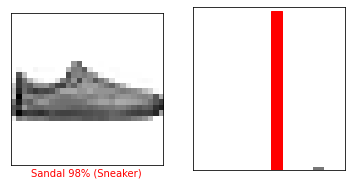

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

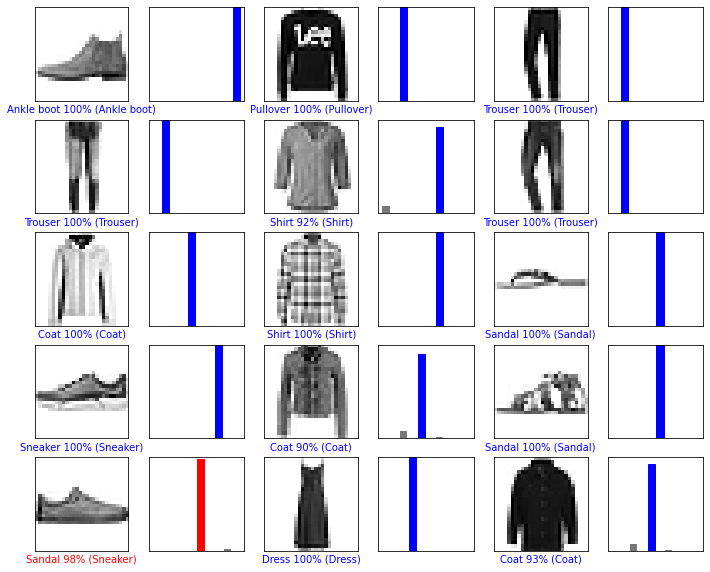

In [42]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [44]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.0005208e-10 2.2207681e-12 1.6788670e-09 3.2706089e-16 1.8148796e-09
  1.2916228e-04 1.4204855e-10 4.2560921e-04 2.3631673e-11 9.9944526e-01]]


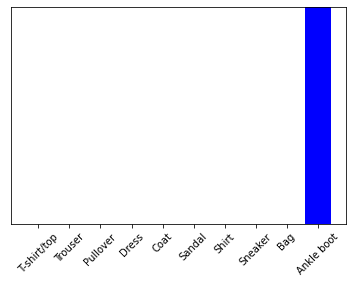

In [46]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
np.argmax(predictions_single[0])

9